In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
!ls tmp/data_Dazai

CKVW6cIgxI_Dazai                 audio_slice.ipynb
CKVW6cIgxI_Dazai.zip             audio_slice_on_colabo.ipynb
CKVW6cIgxI_Dazai_slice           train_Dazai_ORIGINAL.csv
CKVW6cIgxI_Dazai_slice.zip       train_details_Dazai_ORIGINAL.csv


## 元データ

In [6]:
df = pd.read_csv('tmp/data_Dazai/train_Dazai_ORIGINAL.csv')
print(df.shape)
df.head(2)

(74, 6)


,ID,author,title,daisy_folder,audio_path,target
0,1Gckfr5bxxhzvoo,CKVW6cIgxI,96bUO3HpHJ,OyDBhKtUqP,train/CKVW6cIgxI/96bUO3HpHJ/OyDBhKtUqP/JbJJRPU...,これは、もう、疑いをいれない。よほどのものである。こと、怠惰に関してだけは、私は、ほんもので...
1,1ti0Fttao7kYi0r,CKVW6cIgxI,diO56wJe9v,Ttv6lyaoDd,train/CKVW6cIgxI/diO56wJe9v/Ttv6lyaoDd/Af6sX3m...,小説修業に就いて語れ。という出題は、私を困惑させた。就職試験を受けにいって、小学校の算術の問...


In [13]:
# 音声データ
!ls -l tmp/data_Dazai/CKVW6cIgxI_Dazai | wc -l

      75


In [19]:
df['ID'].nunique(), df['author'].nunique(), df['title'].nunique(), 

(74, 1, 74)

In [26]:
# 文字数
df['target_length'] = [len(s) for s in df['target']]

In [27]:
df['target_length'].describe()

count       74.000000
mean      4966.189189
std       5190.235824
min         50.000000
25%       1037.750000
50%       2740.500000
75%       7443.000000
max      20017.000000
Name: target_length, dtype: float64

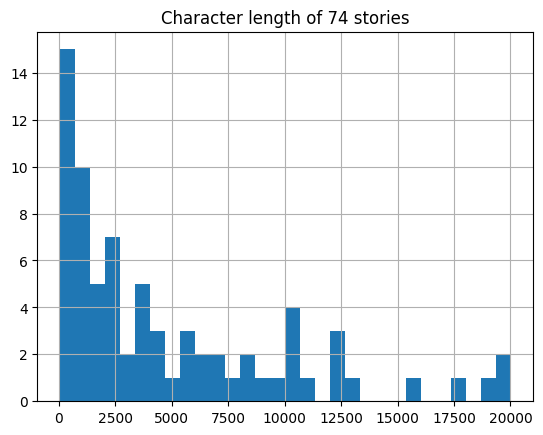

In [32]:
df['target_length'].hist(bins=30)
plt.title('Character length of 74 stories')
plt.show()

## 分割データ

In [50]:
df_detail = pd.read_csv('tmp/data_Dazai/train_details_Dazai_ORIGINAL.csv')
print(df_detail.shape)
df_detail.head()

(22100, 7)


,DETAIL_ID,ID,slice_id,duration,start_time,end_time,target_slice
0,1Gckfr5bxxhzvoo_1,1Gckfr5bxxhzvoo,1,3160.816,0.000,3160.816,これは、もう、疑いをいれない。
1,1Gckfr5bxxhzvoo_2,1Gckfr5bxxhzvoo,2,2847.347,3160.816,6008.163,よほどのものである。
2,1Gckfr5bxxhzvoo_3,1Gckfr5bxxhzvoo,3,2560.000,6008.163,8568.163,こと、怠惰に関してだけは、
3,1Gckfr5bxxhzvoo_4,1Gckfr5bxxhzvoo,4,3030.204,8568.163,11598.367,私は、ほんものである。
4,1Gckfr5bxxhzvoo_5,1Gckfr5bxxhzvoo,5,4048.980,11598.367,15647.347,まさか、それを自慢しているわけではない。


In [51]:
# 音声データ
!ls -l tmp/data_Dazai/CKVW6cIgxI_Dazai_slice | wc -l

   22101


In [55]:
df_detail['ID'].nunique()

74

In [52]:
# 分割音声データの分布
# 元データ単位はmsec
(df_detail['duration']/1000).describe()

count    22100.000000
mean         3.521687
std          1.855969
min          0.417959
25%          2.298776
50%          3.186939
75%          4.336327
max         30.484898
Name: duration, dtype: float64

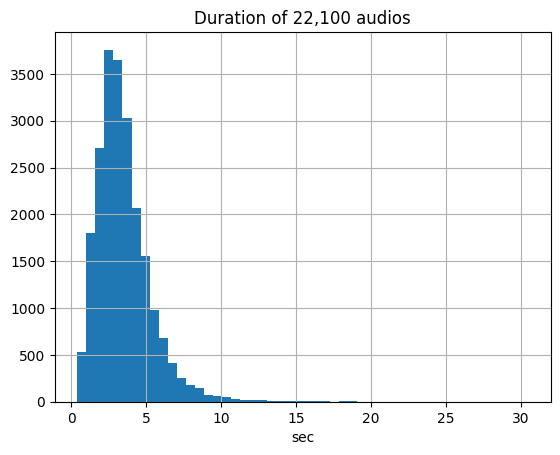

In [53]:
(df_detail['duration']/1000).hist(bins=50)
plt.title('Duration of 22,100 audios')
plt.xlabel('sec')
plt.show()

In [77]:
original_duration = []
for i in df_detail['ID'].unique():
    tmp = df_detail[df_detail['ID']==i]
    tmp_last = tmp[tmp['slice_id']==tmp['slice_id'].max()]
    original_duration.append(tmp_last['end_time'].values[0])
len(original_duration)

74

In [86]:
# 74作品の音声データの長さ
# 分単位
(pd.Series(original_duration)/(1000*60)).describe()

count    74.000000
mean     17.529116
std      18.670327
min       0.251646
25%       3.491048
50%       9.786122
75%      27.118912
max      74.608326
dtype: float64

In [91]:
(pd.Series(original_duration)/(1000*60)).quantile([0.8, 0.9, 0.95])

0.80    30.720348
0.90    43.748876
0.95    57.000664
dtype: float64

In [95]:
sum( (pd.Series(original_duration)/(1000*60))>=57 )

4

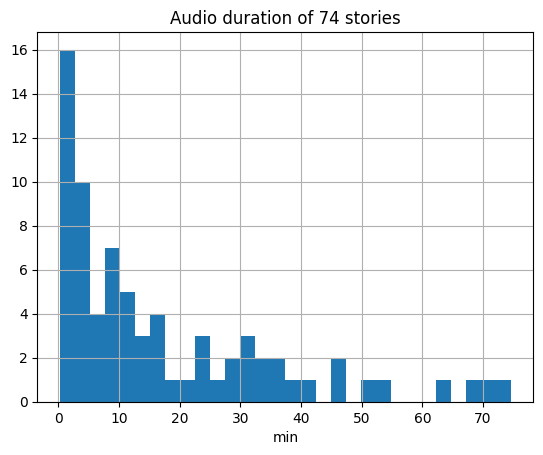

In [87]:
(pd.Series(original_duration)/(1000*60)).hist(bins=30)
plt.title('Audio duration of 74 stories')
plt.xlabel('min')
plt.show()